# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, perform_est, EstType)
from lib import (stack, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
nsample = 1000

def comparison(φ_vals, σ, ylim, *params):
    title = "AR(p) Comparison Plot"
    labels = [f"φ={val}" for val in φ_vals] 
    scan = DataSource.create_parameter_scan(SourceType.AR, *params)
    stack(scan, ylim=ylim, title=title, labels=labels, data_type=DataType.TIME_SERIES)
    return scan

## Simulations

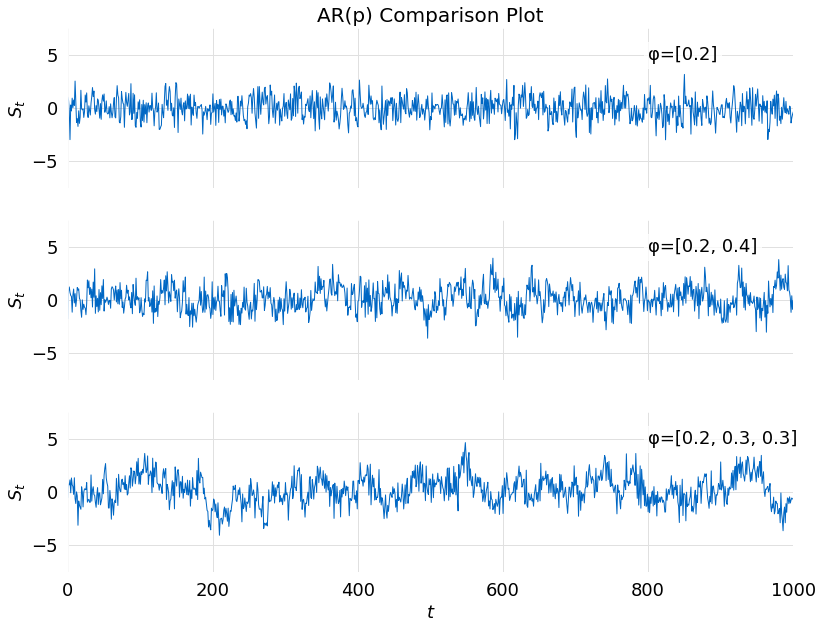

In [3]:
σ = 1.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-7.5, 7.5], *params)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example $\varphi = 0.2$

In [4]:
df = DataFunc.apply_func_type(ar[0], DataType.PACF, nlags=1)
df["PACF"][1]

0.16001782915055543

In [5]:
results = perform_est(ar[0], EstType.AR, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1439.095
Date:                Tue, 17 May 2022   AIC                           2884.190
Time:                        21:11:25   BIC                           2898.917
Sample:                             0   HQIC                          2889.787
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.038      0.005      0.996      -0.075       0.075
ar.L1          0.1600      0.030      5.316      0.000       0.101       0.219
sigma2         1.0381      0.049     21.170      0.000       0.942       1.134
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.88   Prob(JB):                         0.37
Heteroskedasticity (H):               1.10   Skew:                            -0.03
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
ar[0].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 1.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(1)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.00017315330820401748, 0.03834667391208115],
    'Parameters': [[0.1600397341769652, 0.030104171853009457]],
    'Sigma2': [1.038128947105652, 0.04903878274359986]}},
  'Tests': {}},
 'Date': '17/05/2022 21:11:25',
 'Name': 'AR(1)-Simulation-2df699c1-dfa5-45a7-8e13-638e9ddfb1e0',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

### AR(2) Example $\varphi = [0.2, 0.4]$

In [7]:
df = DataFunc.apply_func_type(ar[1], DataType.PACF, nlags=2)
df["PACF"][1:3]

1    0.214597
2    0.387509
Name: PACF, dtype: float64

In [8]:
results = perform_est(ar[1], EstType.AR, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1427.905
Date:                Tue, 17 May 2022   AIC                           2863.809
Time:                        21:11:25   BIC                           2883.444
Sample:                             0   HQIC                          2871.272
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1244      0.080      1.558      0.119      -0.032       0.281
ar.L1          0.2141      0.029      7.266      0.000       0.156       0.272
ar.L2          0.3881      0.030     13.005      0.000       0.330       0.447
sigma2         1.0147      0.046     21.994      0.000       0.924       1.105
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.73   Prob(JB):                         0.58
Heteroskedasticity (H):               0.92   Skew:                             0.08
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ar[1].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(2)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.12436688938363484, 0.07983467516168874],
    'Parameters': [[0.21413897237877472, 0.029473195688857687],
     [0.3880825423709185, 0.02984179790052127]],
    'Sigma2': [1.0147187406881883, 0.04613692024763035]}},
  'Tests': {}},
 'Date': '17/05/2022 21:11:25',
 'Name': 'AR(2)-Simulation-e3ec6ec9-216a-453d-bf32-6bc865f8a1d1',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

### AR(3) Example $\varphi = [0.2, 0.3, 0.3]$

In [10]:
df = DataFunc.apply_func_type(ar[2], DataType.PACF, nlags=3)
df["PACF"][1:4]

1    0.213612
2    0.310709
3    0.295879
Name: PACF, dtype: float64

In [11]:
results = perform_est(ar[2], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1406.582
Date:                Tue, 17 May 2022   AIC                           2823.163
Time:                        21:11:26   BIC                           2847.707
Sample:                             0   HQIC                          2832.491
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1787      0.173      1.035      0.300      -0.160       0.517
ar.L1          0.2130      0.031      6.982      0.000       0.153       0.273
ar.L2          0.3105      0.031     10.109      0.000       0.250       0.371
ar.L3          0.2957      0.031      9.656      0.000       0.236       0.356
sigma2         0.9718      0.043     22.345      0.000       0.887       1.057
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.92   Prob(JB):                         0.94
Heteroskedasticity (H):               0.96   Skew:                            -0.03
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
ar[2].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 1.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [0.17870883836918142, 0.1726006018650426],
    'Parameters': [[0.2129509612338235, 0.030501832497460024],
     [0.31053669639089193, 0.030719995404072196],
     [0.2957456533208996, 0.03062786813296678]],
    'Sigma2': [0.9718430126622652, 0.04349176948284859]}},
  'Tests': {}},
 'Date': '17/05/2022 21:11:25',
 'Name': 'AR(3)-Simulation-89d5b3ee-4040-4913-97a9-4b6630011c8b',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

## Simulations $\sigma = 5.0$

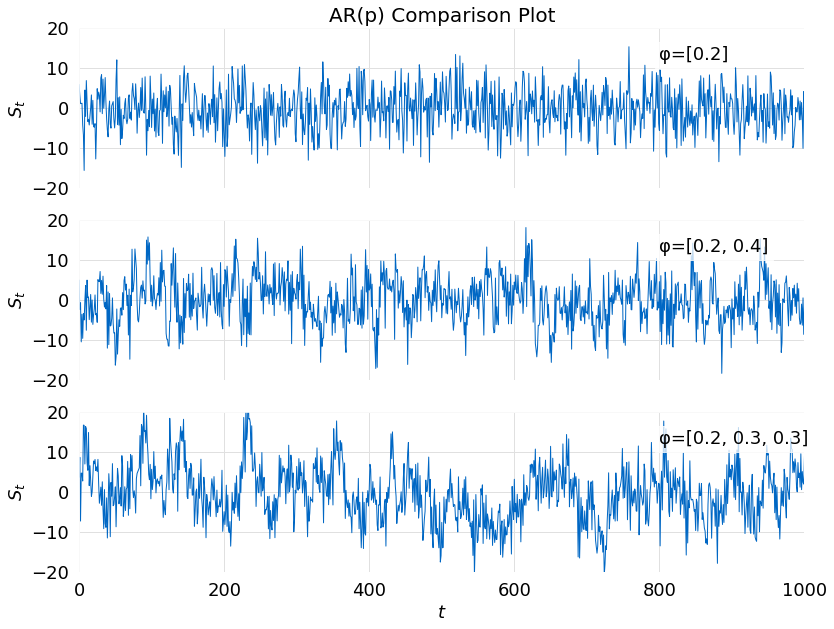

In [13]:
σ = 5.0
φ_vals = [[0.2], [0.2, 0.4], [0.2, 0.3, 0.3]]
params = [{"φ": φ, "σ": σ, "xmax": nsample} for φ in φ_vals]
ar = comparison(φ_vals, σ, [-20.0, 20.0], *params)

### AR(1) Example ($\varphi = 0.2$)

In [14]:
df = DataFunc.apply_func_type(ar[0], DataType.PACF, nlags=1)
df["PACF"][1]

0.13575323405710046

In [15]:
results = perform_est(ar[0], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3043.464
Date:                Tue, 17 May 2022   AIC                           6096.928
Time:                        21:11:26   BIC                           6121.471
Sample:                             0   HQIC                          6106.256
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2355      0.183     -1.288      0.198      -0.594       0.123
ar.L1          0.1358      0.033      4.175      0.000       0.072       0.200
ar.L2          0.0019      0.031      0.062      0.950      -0.059       0.063
ar.L3         -0.0165      0.032     -0.517      0.605      -0.079       0.046
sigma2        25.6086      1.194     21.455      0.000      23.269      27.948
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.98   Prob(JB):                         0.50
Heteroskedasticity (H):               0.97   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
ar[0].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2], 'σ': 5.0},
  'Description': 'AR(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.23546513171815037, 0.18287266163640015],
    'Parameters': [[0.13584577145026575, 0.03254010356859],
     [0.0019471622387928437, 0.031202376731051987],
     [-0.01651492603268462, 0.03195076593183843]],
    'Sigma2': [25.608573071371687, 1.1936008610546536]}},
  'Tests': {}},
 'Date': '17/05/2022 21:11:26',
 'Name': 'AR(1)-Simulation-7f247255-52b9-43a6-ab82-5610cd4c991f',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [17]:
df = DataFunc.apply_func_type(ar[1], DataType.PACF, nlags=2)
df["PACF"][1:3]

1    0.200006
2    0.403542
Name: PACF, dtype: float64

In [18]:
results = perform_est(ar[1], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3042.864
Date:                Tue, 17 May 2022   AIC                           6095.729
Time:                        21:11:26   BIC                           6120.272
Sample:                             0   HQIC                          6105.057
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1489      0.411     -0.362      0.717      -0.955       0.657
ar.L1          0.1909      0.030      6.294      0.000       0.131       0.250
ar.L2          0.3998      0.028     14.040      0.000       0.344       0.456
ar.L3          0.0215      0.031      0.686      0.492      -0.040       0.083
sigma2        25.5657      1.134     22.554      0.000      23.344      27.787
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.99   Prob(JB):                         0.95
Heteroskedasticity (H):               0.93   Skew:                             0.01
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar[1].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'AR(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.14889918613534245, 0.4112857398932949],
    'Parameters': [[0.19086106177014478, 0.030323701281190885],
     [0.3997594937351978, 0.02847265123984052],
     [0.02145805235103165, 0.03126351060755372]],
    'Sigma2': [25.565724188169753, 1.1335216485241106]}},
  'Tests': {}},
 'Date': '17/05/2022 21:11:26',
 'Name': 'AR(2)-Simulation-81e59f7c-c0f2-49be-8a2b-43b6c0083abe',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [20]:
df = DataFunc.apply_func_type(ar[2], DataType.PACF, nlags=3)
df["PACF"][1:4]

1    0.233636
2    0.276852
3    0.292313
Name: PACF, dtype: float64

In [21]:
results = perform_est(ar[2], EstType.AR, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -3070.248
Date:                Tue, 17 May 2022   AIC                           6150.496
Time:                        21:11:26   BIC                           6175.040
Sample:                             0   HQIC                          6159.824
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2310      0.831     -0.278      0.781      -1.859       1.397
ar.L1          0.2330      0.031      7.558      0.000       0.173       0.293
ar.L2          0.2772      0.030      9.112      0.000       0.218       0.337
ar.L3          0.2926      0.030      9.605      0.000       0.233       0.352
sigma2        26.9919      1.214     22.230      0.000      24.612      29.372
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.88   Prob(JB):                         0.99
Heteroskedasticity (H):               1.08   Skew:                            -0.00
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar[2].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'φ': [0.2, 0.3, 0.3], 'σ': 5.0},
  'Description': 'AR(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'AR(3)': {'Type': <EstType.AR: 'AR'>,
    'Const': [-0.23103079190917913, 0.8305893086235792],
    'Parameters': [[0.23303398889589705, 0.030830795043610727],
     [0.2771719216273647, 0.030417758148028398],
     [0.2925736578655165, 0.030462023092822855]],
    'Sigma2': [26.991852906306235, 1.2142151704901705]}},
  'Tests': {}},
 'Date': '17/05/2022 21:11:26',
 'Name': 'AR(3)-Simulation-c2fcac1c-fe30-4c4d-be74-556233818a24',
 'SourceSchema': DataSchema(xcol=(Time), ycol=(S(t)), data_type=(DataType.TIME_SERIES))}